# PISA 2022 analysis

Some basic analysis on school student performance in PISA tests across OECD countries. in particular we examine
- the effect of GDP per capita
- Culture
- Gender
- etc.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading data
(data source: https://www.oecd-ilibrary.org/education/pisa-2022-results-volume-i_53f23881-en )

In [3]:
df_score__raw = pd.read_csv("data/pisa_2022.csv")
df_score__raw

,category,country,gender,score
0,math,Australia,girl,481
1,math,Australia,boy,493
2,reading,Australia,girl,509
3,reading,Australia,boy,487
4,science,Australia,girl,506
...,...,...,...,...
97,math,Ireland,boy,498
98,reading,Ireland,girl,525
99,reading,Ireland,boy,507
100,science,Ireland,girl,501


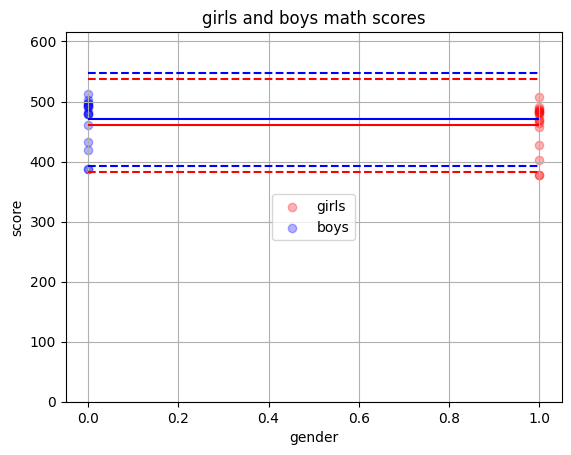

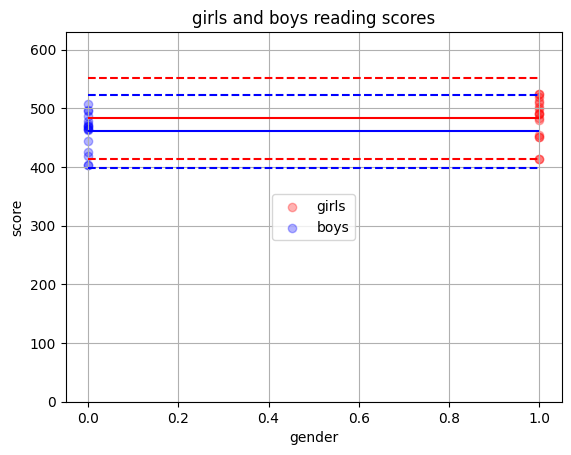

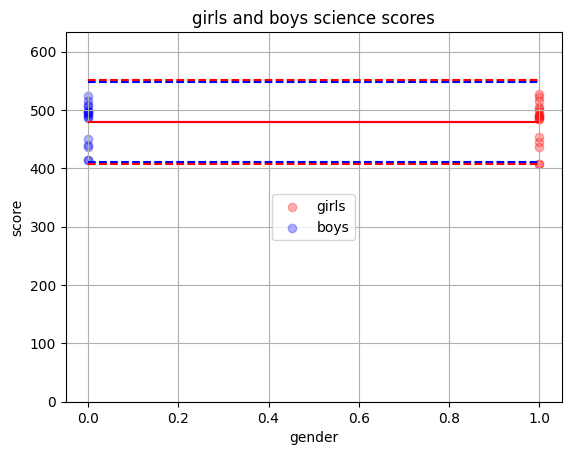

In [52]:
df_score = df_score__raw.copy()

df_score["is_girl"] = (df_score["gender"] == "girl").astype(int)
df_score = df_score.drop(columns=["gender"])
for subject in ["math", "reading", "science"]:
    
    df_score__math = df_score[df_score["category"] == subject]
    df_score__math_girl =  df_score__math[df_score__math["is_girl"] == 1]
    df_score__math_boy =  df_score__math[df_score__math["is_girl"] == 0]
    
    plt.figure()
    plt.title(f"girls and boys {subject} scores")
    plt.scatter(x=df_score__math_girl["is_girl"], y=df_score__math_girl["score"],
                color="red", label="girls", alpha=0.3)
    plt.scatter(x=df_score__math_boy["is_girl"], y=df_score__math_boy["score"],
                color="blue", label="boys", alpha=0.3)
    plt.legend(loc="center")
    plt.hlines(df_score__math_boy["score"].mean(), 0, 1, color="blue",ls="-")
    plt.hlines(df_score__math_girl["score"].mean(), 0, 1, color="red",ls="-")

    plt.hlines(df_score__math_boy["score"].mean() +\
        df_score__math_boy["score"].std() * 1.97, 0, 1, color="blue", ls="--")
    plt.hlines(df_score__math_boy["score"].mean() -\
        df_score__math_boy["score"].std() * 1.97, 0, 1, color="blue", ls="--")

    plt.hlines(df_score__math_girl["score"].mean() +\
        df_score__math_girl["score"].std() * 1.97, 0, 1, color="red", ls="--")
    plt.hlines(df_score__math_girl["score"].mean() - \
        df_score__math_girl["score"].std() * 1.97, 0, 1, color="red", ls="--")

    plt.ylim(0, max(df_score__math_girl["score"].max(), df_score__math_boy["score"].max()) * 1.2)
    plt.xlabel("gender")
    plt.ylabel("score")
    plt.grid()
    plt.show()
    

pl